# RecCen Charts 

In [15]:
import os
import matplotlib as mpl
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd

In [4]:
# Variable Declarations
dates = {}
hours = {}
days = {}
weeks = {}

## NOTE:
### When running locally always rerun the cell below if the data in any of the 4 dictionaries is being manipulated

In [5]:
with open("./Data _ Rec Cen - Sheet.csv", "r") as data:
    dates.clear()
    hours.clear()
    days.clear()
    weeks.clear()
    add = 0

    data.readline()
    csvreader = csv.reader(data)
    for row in csvreader:
        if row[0].strip() in dates:
            add = dates[row[0].strip()]
        else:
            add = 0
        dates.update({row[0].strip(): int(row[2].strip()) + add})

    add = 0
    data.seek(0)
    data.readline()
    csvreader = csv.reader(data)
    for row in csvreader:
        if row[1].strip() in hours:
            add = hours[row[1].strip()]
        else:
            add = 0
        hours.update({row[1].strip(): int(row[2].strip()) + add})

    add = 0
    data.seek(0)
    data.readline()
    csvreader = csv.reader(data)
    for row in csvreader:
        if row[3].strip() in days:
            add = days[row[3].strip()]
        else:
            add = 0
        days.update({row[3].strip(): int(row[2].strip()) + add})

In [6]:
print(dates)
print(hours)
print(days)

{'9/29/19': 2333, '9/30/19': 4728, '10/1/19': 4300, '10/2/19': 4278, '10/3/19': 3848, '10/4/19': 2952, '10/5/19': 1942, '10/6/19': 1878, '10/7/19': 4089, '10/8/19': 4086, '10/9/19': 3811, '10/10/19': 3484, '10/11/19': 2858, '10/12/19': 1764, '10/13/19': 1720, '10/14/19': 3872, '10/15/19': 3753, '10/16/19': 3441, '10/17/19': 3284, '10/18/19': 2582, '10/19/19': 1807, '10/20/19': 1640, '10/21/19': 3551, '10/22/19': 3627, '10/23/19': 3459, '10/24/19': 3231, '10/25/19': 2467, '10/26/19': 1713, '10/27/19': 1761, '10/28/19': 3548, '10/29/19': 3383, '10/30/19': 3156, '10/31/19': 2658, '11/1/19': 2285, '11/2/19': 1735, '11/3/19': 1789, '11/4/19': 3479, '11/5/19': 3526, '11/6/19': 3309, '11/7/19': 3125, '11/8/19': 2438, '11/9/19': 1552, '11/10/19': 1778, '11/11/19': 0, '11/12/19': 3731, '11/13/19': 3344, '11/14/19': 3454, '11/15/19': 2767, '11/16/19': 1980, '11/17/19': 1856, '11/18/19': 3578, '11/19/19': 3596, '11/20/19': 3212, '11/21/19': 3187, '11/22/19': 2627, '11/23/19': 1797, '11/24/19': 16

### VISITS VS DAY

{'Sunday': 17745, 'Monday': 34993, 'Tuesday': 36794, 'Wednesday': 32876, 'Thursday': 30478, 'Friday': 24129, 'Saturday': 16293}


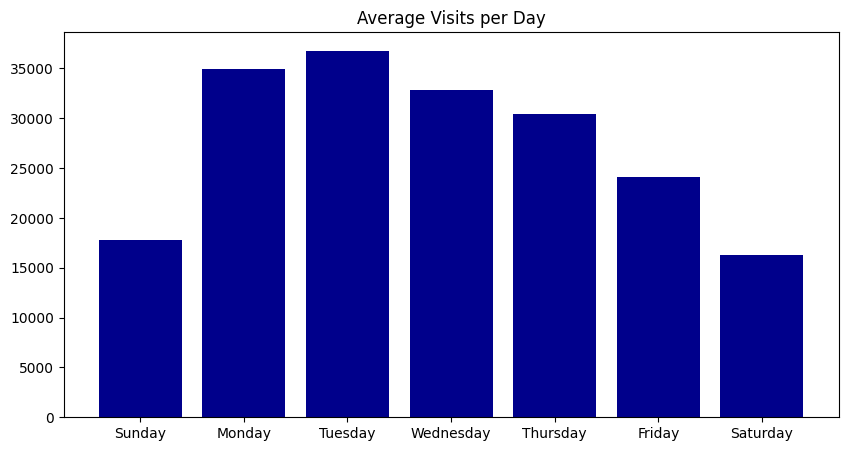

In [7]:
from turtle import color


print(days)

lists = days.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize= (10, 5))
plt.bar(x, y, align='center', color='darkblue')
plt.title("Average Visits per Day")
plt.show()

### Visits per week

In [8]:
week_count = 1
day_counter = 1
add = 0
for d in dates:
    if week_count in weeks:
        add = weeks[week_count]
    else:
        add = 0
    weeks[week_count] = dates[d] + add

    day_counter += 1
    if day_counter == 8:
        week_count += 1
        day_counter = 1

{1: 24381, 2: 21970, 3: 20459, 4: 19688, 5: 18526, 6: 19218, 7: 17054, 8: 19853, 9: 7083, 10: 14815, 11: 10261}


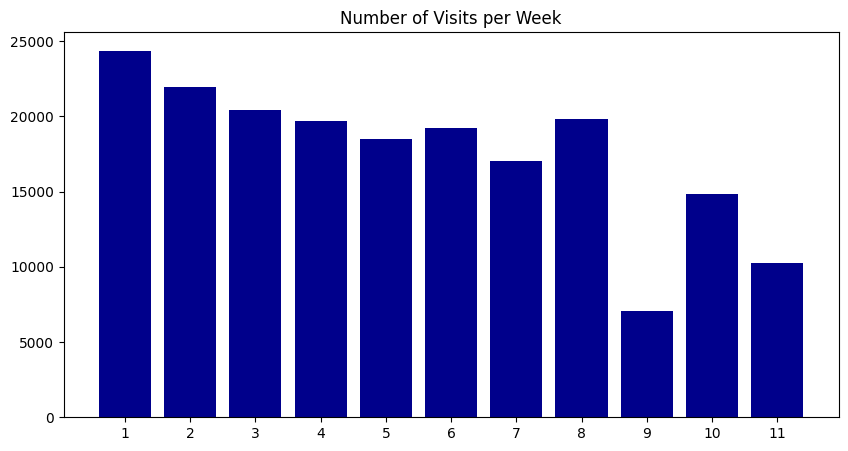

In [9]:
print(weeks)

lists = weeks.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize= (10, 5))
plt.bar(x, y, align='center', color='darkblue')
plt.xticks(range(1,12))
plt.title("Number of Visits per Week")
plt.show()

## Below function definitions were found at this link:
https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap

In [12]:
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
DAYS = list(days.keys())


In [49]:
def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax


In [50]:
def date_heatmap_demo():
    '''An example for `date_heatmap`.

    Most of the sizes here are chosen arbitrarily to look nice with 1yr of
    data. You may need to fiddle with the numbers to look right on other data.
    '''
    # Get some data, a series of values with datetime index.
    data = np.random.randint(5, size=365)
    data = pd.Series(data)
    data.index = pd.date_range(start='2017-01-01', end='2017-12-31', freq='1D')

    # Create the figure. For the aspect ratio, one year is 7 days by 53 weeks.
    # We widen it further to account for the tick labels and color bar.
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)

    # Plot the heatmap with a color bar.
    ax = date_heatmap(data, edgecolor='black')
    plt.colorbar(ticks=range(5), pad=0.02)

    # Use a discrete color map with 5 colors (the data ranges from 0 to 4).
    # Extending the color limits by 0.5 aligns the ticks in the color bar.
    cmap = mpl.cm.get_cmap('Blues', 5)
    plt.set_cmap(cmap)
    plt.clim(-0.5, 4.5)

    # Force the cells to be square. If this is set, the size of the color bar
    # may look weird compared to the size of the heatmap. That can be corrected
    # by the aspect ratio of the figure or scale of the color bar.
    ax.set_aspect('equal')

    # Save to a file. For embedding in a LaTeX doc, consider the PDF backend.
    # http://sbillaudelle.de/2015/02/23/seamlessly-embedding-matplotlib-output-into-latex.html
    fig.savefig('heatmap.pdf', bbox_inches='tight')

    # The firgure must be explicitly closed if it was not shown.
    plt.close(fig)

RuntimeError: You must first define an image, e.g., with imshow

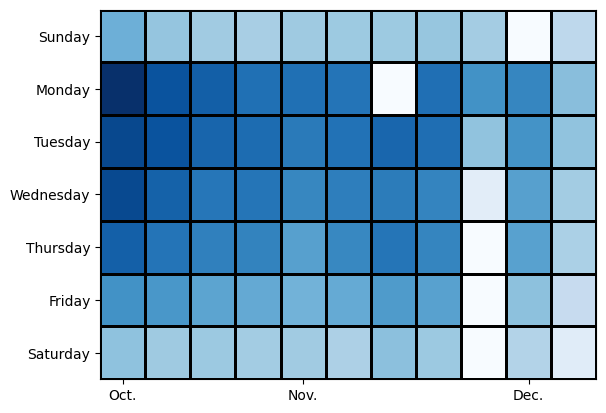

<Figure size 640x480 with 0 Axes>

In [58]:
dd = pd.Series(dates.values())
dd.index = pd.date_range(start='9/29/19', end='12/14/19', freq='1D')

ax = date_heatmap(dd, edgecolor='black')
plt.figure()
cmap = mpl.cm.get_cmap('Blues', 5)
plt.set_cmap(cmap)
plt.clim(-0.5, 4.5)

ax.set_aspect('equal')
plt.show()